In [39]:
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-poster')

In [50]:
np.random.seed(100)
A = np.random.random((50,2))*100

In [70]:
# If we have another point
B = [50, 50]

In [71]:
kdtree = spatial.cKDTree(A)

In [72]:
# it returns the distance and the index of the points, 3 means we want the top 3 cloest points
dist, ix = kdtree.query(B, 3)

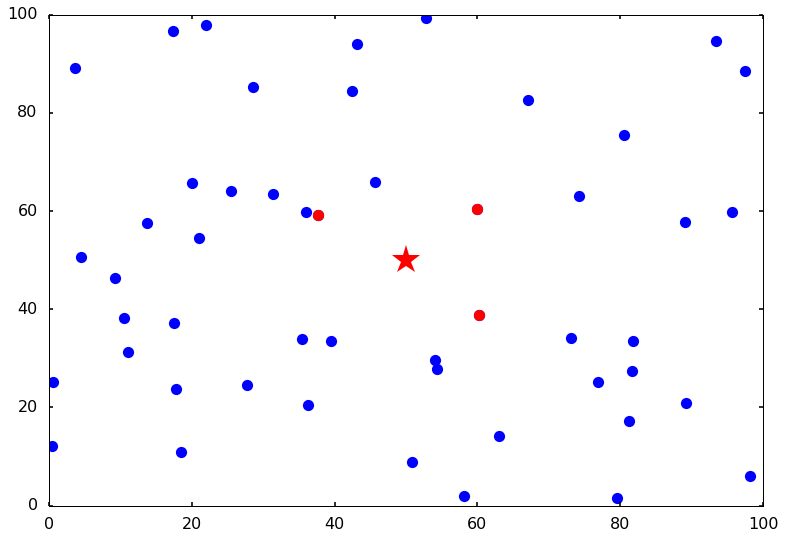

In [73]:
plt.plot(A[:, 0], A[:, 1], 'o')
plt.plot(B[0], B[1], 'r*', markersize = 30)
plt.plot(A[:, 0][ix], A[:, 1][ix], 'ro')

## Find all points within certain distance

In [93]:
# let's find all the points within distance 50 from point B
ix_list = kdtree.query_ball_point(B, 20, p = 2.)

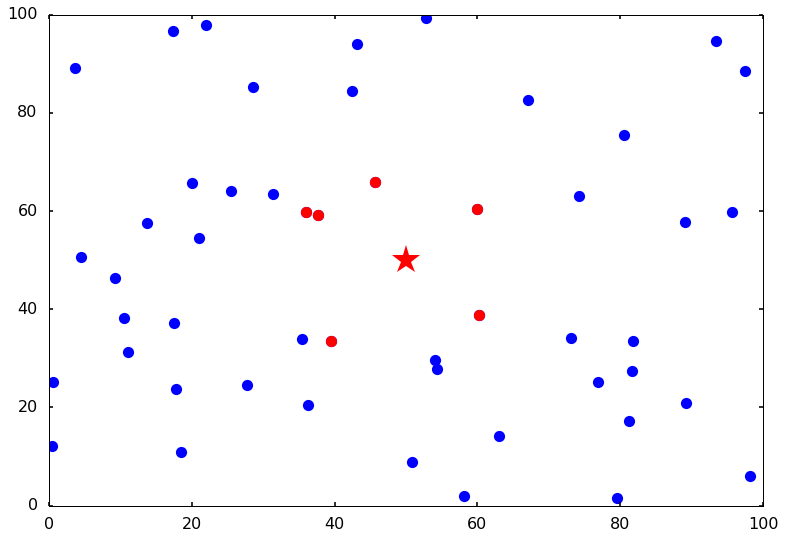

In [94]:
plt.plot(A[:, 0], A[:, 1], 'o')
plt.plot(B[0], B[1], 'r*', markersize = 30)
plt.plot(A[:, 0][ix_list], A[:, 1][ix_list], 'ro')

## Find all pairs within certain distance

In [37]:
# let's find all the points within distance 50 from point B
kdtree.query_ball_tree(kdtree, 10)

[[0], [1], [2], [3], [4], [5, 8, 9], [6], [7], [5, 8], [5, 9]]

## Use the real distances on earth

In [95]:
from mpl_toolkits.basemap import Basemap

In [99]:
llat = 37.0
ulat = 38.5
llon = -123
ulon = -121.5

lats = np.arange(llat, ulat, 0.1)
lons = np.arange(llon, ulon, 0.1)
lons, lats = np.meshgrid(lons, lats)

# flatten the locations
lons_1d = lons.flatten()
lats_1d = lats.flatten()

lat_0 = (llat + ulat) / 2.
lon_0 = (llon + ulon) / 2.

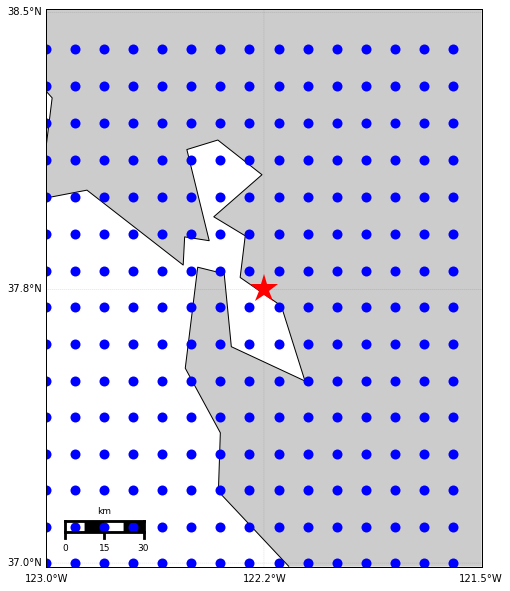

In [126]:
plt.figure(figsize=(10,10))
m = Basemap(projection='merc', lon_0=-125.36929, lat_0=38.3215, 
        llcrnrlon=llon,llcrnrlat=llat- 0.01,urcrnrlon=ulon,urcrnrlat=ulat + 0.01,resolution='l')
m.drawcoastlines()
m.drawmapboundary()

m.drawparallels(np.arange(llat, ulat + 0.01, (ulat - llat)/2.), labels=[1,0,0,0], linewidth=0.1, fmt='%.1f')
m.drawmeridians(np.arange(llon, ulon + 0.01, (ulon - llon)/2.), labels=[0,0,0,1], linewidth=0.1, fmt='%.1f') 

x_0, y_0 = m(lons_1d, lats_1d)
m.plot(x_0, y_0, 'bo', markersize=10) 

x_0, y_0 = m(lon_0, lat_0)
m.plot(x_0, y_0, 'r*', markersize=30) 

m.fillcontinents()
m.drawmapscale(llon + 0.2, llat + 0.1, lon_0, lat_0, 30, 'fancy')

plt.show()

## Find the points within 20 km

[Reference](https://stackoverflow.com/questions/43020919/scipy-how-to-convert-kd-tree-distance-from-query-to-kilometers-python-pandas)

In [140]:
from math import *

def to_Cartesian(lat, lng):
    R = 6371 # radius of the Earth in kilometers

    x = R * cos(lat) * cos(lng)
    y = R * cos(lat) * sin(lng)
    z = R * sin(lat)
    return x, y, z

def deg2rad(degree):
    rad = degree * 2*np.pi / 360
    return(rad)

def rad2deg(rad):
    degree = rad/2/np.pi * 360
    return(degree)

def distToKM(x):
    R = 6371 # earth radius
    gamma = 2*np.arcsin(deg2rad(x/(2*R))) # compute the angle of the isosceles triangle
    dist = 2*R*sin(gamma/2) # compute the side of the triangle
    return(dist)

def kmToDIST(x):
    R = 6371 # earth radius
    gamma = 2*np.arcsin(x/2./R) 
    
    dist = 2*R*rad2deg(sin(gamma / 2.))
    return(dist)


In [149]:
x, y, z = zip(*map(to_Cartesian, lats_1d, lons_1d))
x_t, y_t, z_t = to_Cartesian(lat_0, lon_0)

In [150]:
dist = kmToDIST(30)

In [151]:
coordinates = list(zip(x, y, z))
tree = spatial.cKDTree(coordinates)

In [152]:
ix = tree.query_ball_point((x_t, y_t, z_t), dist)

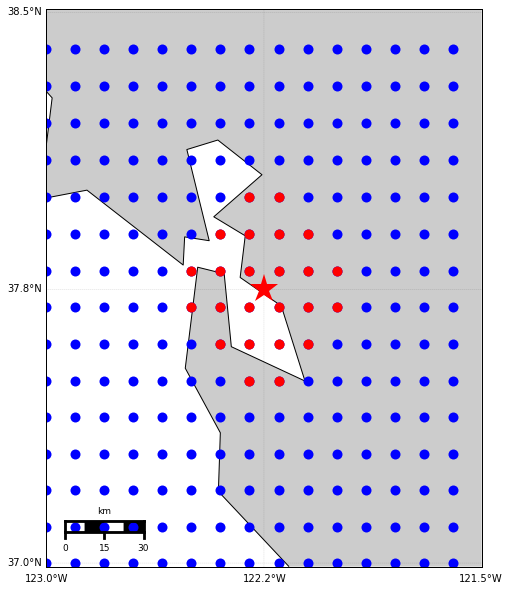

In [153]:
plt.figure(figsize=(10,10))
m = Basemap(projection='merc', lon_0=-125.36929, lat_0=38.3215, 
        llcrnrlon=llon,llcrnrlat=llat- 0.01,urcrnrlon=ulon,urcrnrlat=ulat + 0.01,resolution='l')
m.drawcoastlines()
m.drawmapboundary()

m.drawparallels(np.arange(llat, ulat + 0.01, (ulat - llat)/2.), labels=[1,0,0,0], linewidth=0.1, fmt='%.1f')
m.drawmeridians(np.arange(llon, ulon + 0.01, (ulon - llon)/2.), labels=[0,0,0,1], linewidth=0.1, fmt='%.1f') 

x_0, y_0 = m(lons_1d, lats_1d)
m.plot(x_0, y_0, 'bo', markersize=10) 

x_0, y_0 = m(lon_0, lat_0)
m.plot(x_0, y_0, 'r*', markersize=30) 

x_0, y_0 = m(lons_1d[ix], lats_1d[ix])
m.plot(x_0, y_0, 'ro', markersize=10) 

m.fillcontinents()
m.drawmapscale(llon + 0.2, llat + 0.1, lon_0, lat_0, 30, 'fancy')

plt.show()

## Find the distances for the cloest 10 points

In [156]:
dist, ix = tree.query((x_t, y_t, z_t), 10)

In [158]:
map(distToKM, dist)

[7.849314101994533,
 7.849314102001198,
 7.859304141667372,
 7.859304141674064,
 17.516008198378657,
 17.516008198387585,
 17.547633149227252,
 17.547633149230194,
 17.55621138531865,
 17.556211385327607]